# Data import

In this section we import the chosen five different data sets (finance, news, movies, twitter and reddit). Each data frame will haev the same formatting, only retaining three columns:
- text: text input
- ground_truth: sentiment label (positive, negative, neutral)
- topic: indicates from which dataset the observations comes from (finance, news, movies, twitter, reddit)

In [1]:
! pip install kagglehub

In [2]:
import kagglehub
import pandas as pd
import os

In [3]:
# finance data

path = kagglehub.dataset_download("sbhatti/financial-sentiment-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/financial-sentiment-analysis


In [4]:
csv_file = os.path.join(path, "data.csv")

df_finance = pd.read_csv(csv_file, encoding="ISO-8859-1")

In [5]:
df_finance.rename(columns={df_finance.columns[0]: "text"}, inplace=True)
df_finance.rename(columns={df_finance.columns[1]: "ground_truth"}, inplace=True)
df_finance["topic"] = "finance"

df_finance.head()

,text,ground_truth,topic
0,The GeoSolutions technology will leverage Bene...,positive,finance
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,finance
2,"For the last quarter of 2010 , Componenta 's n...",positive,finance
3,According to the Finnish-Russian Chamber of Co...,neutral,finance
4,The Swedish buyout firm has sold its remaining...,neutral,finance


In [6]:
# news data

path = kagglehub.dataset_download("cashbowman/sentiment-labeled-headlines")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment-labeled-headlines


In [7]:
path = os.path.join(path, 'Sentiments', 'guardian_sentiment.csv')

df_news = pd.read_csv(path, encoding="UTF-8")

In [8]:
df_news.head()

,Unnamed: 0,Time,Headlines,Sentiment
0,0,18-Jul-20,Johnson is asking Santa for a Christmas recovery,4
1,1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...,1
2,2,18-Jul-20,Five key areas Sunak must tackle to serve up e...,5
3,3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...,1
4,4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...,5


In [9]:
df_news.rename(columns={df_news.columns[2]: "text"}, inplace=True)
df_news.rename(columns={df_news.columns[3]: "ground_truth"}, inplace=True)
df_news["topic"] = "news"
df_news = df_news[["text", "ground_truth", "topic"]]

df_news.head()


,text,ground_truth,topic
0,Johnson is asking Santa for a Christmas recovery,4,news
1,‘I now fear the worst’: four grim tales of wor...,1,news
2,Five key areas Sunak must tackle to serve up e...,5,news
3,Covid-19 leaves firms ‘fatally ill-prepared’ f...,1,news
4,The Week in Patriarchy \n\n\n Bacardi's 'lad...,5,news


In this data set, the default sentiment classification is a five-step scale. We will map these to have very negative (1) as negative, neutral (3) as neutral and very positive (5) as positive. We will drop observations that are rated 2 (negative) and 4 (positive) to only have clear cases and stronger sentiment intensity in our observaitons.

In [10]:
mapping = {1: "negative", 3: "neutral", 5: "positive"}

# Apply mapping to the "ground_truth" column
df_news["ground_truth"] = df_news["ground_truth"].map(mapping)


In [11]:
df_news.dropna()

,text,ground_truth,topic
1,‘I now fear the worst’: four grim tales of wor...,negative,news
2,Five key areas Sunak must tackle to serve up e...,positive,news
3,Covid-19 leaves firms ‘fatally ill-prepared’ f...,negative,news
4,The Week in Patriarchy \n\n\n Bacardi's 'lad...,positive,news
5,English councils call for smoking ban outside ...,negative,news
...,...,...,...
17794,Hundreds to lose jobs as Britvic shuts down No...,negative,news
17795,How investing in solar energy can create a bri...,positive,news
17796,Poundland suppliers hit by insurance downgrade,negative,news
17798,Unilever sells household name spreads to KKR f...,negative,news


In [12]:
# reddit data

path = kagglehub.dataset_download("cosmos98/twitter-and-reddit-sentimental-analysis-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/twitter-and-reddit-sentimental-analysis-dataset


In [13]:
csv_file = os.path.join(path, "Reddit_Data.csv")

df_reddit = pd.read_csv(csv_file, encoding="ISO-8859-1")

In [14]:
df_reddit["topic"] = "reddit"
df_reddit.rename(columns={df_reddit.columns[0]: "text"}, inplace=True)
df_reddit.rename(columns={df_reddit.columns[1]: "ground_truth"}, inplace=True)

The dataset labels the sentiment as -1 (negative), 0 (neutral) and 1 (positive). For conformity with other data sets, this is mapped to text labels.

In [15]:
# Define the mapping
mapping = {-1: "negative", 0: "neutral", 1: "positive"}

# Apply mapping to the "ground_truth" column
df_reddit["ground_truth"] = df_reddit["ground_truth"].map(mapping)


In [16]:
df_reddit.head()

,text,ground_truth,topic
0,family mormon have never tried explain them t...,positive,reddit
1,buddhism has very much lot compatible with chr...,positive,reddit
2,seriously don say thing first all they won get...,negative,reddit
3,what you have learned yours and only yours wha...,neutral,reddit
4,for your own benefit you may want read living ...,positive,reddit


In [17]:
# twitter data

csv_file = os.path.join(path, "Twitter_Data.csv")

#df = pd.read_csv(csv_file)
df_twitter = pd.read_csv(csv_file, encoding="UTF-8")

In [18]:
df_twitter["topic"] = "twitter"
df_twitter.rename(columns={df_twitter.columns[0]: "text"}, inplace=True)
df_twitter.rename(columns={df_twitter.columns[1]: "ground_truth"}, inplace=True)

In [19]:
df_twitter["ground_truth"] = df_twitter["ground_truth"].map(mapping)

In [20]:
df_twitter.head()

,text,ground_truth,topic
0,when modi promised “minimum government maximum...,negative,twitter
1,talk all the nonsense and continue all the dra...,neutral,twitter
2,what did just say vote for modi welcome bjp t...,positive,twitter
3,asking his supporters prefix chowkidar their n...,positive,twitter
4,answer who among these the most powerful world...,positive,twitter


In [21]:
# movie reviews
path = kagglehub.dataset_download("yacharki/movie-review-sentiment-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/movie-review-sentiment-analysis


In [22]:
path = os.path.join(path, 'Movie Reviews Sentences for Sentiment Analysis NLP')
os.listdir(path)


['ReadMe.txt', 'train.csv', 'test.csv']

In [23]:
csv_file = os.path.join(path, "test.csv")


df_movie_1 = pd.read_csv(csv_file, encoding="ISO-8859-1")

In [24]:
csv_file = os.path.join(path, "train.csv")


df_movie_2 = pd.read_csv(csv_file, encoding="ISO-8859-1")

In [25]:
df_movie = pd.concat([df_movie_1, df_movie_2], ignore_index=True)

In [26]:
df_movie["topic"] = "movie"
df_movie.rename(columns={df_movie.columns[0]: "ground_truth"}, inplace=True)
df_movie.rename(columns={df_movie.columns[1]: "text"}, inplace=True)

In [27]:
df_movie["ground_truth"].unique()

array([2, 3, 0, 1, 4])

This data also uses a 5-step scale, where 0 (very negative) will be converted to negative, 2 (neutral) will become neutral, 4 (very positive) will be positive. 1 (negative) and 3 (positive) will be droppped to retain only texts with stronger sentiment intensity. This is the same logic as in case of the news data set.

In [28]:
# Define the mapping
mapping = {0: "negative", 2: "neutral", 4: "positive"}

# Apply mapping to the "ground_truth" column
df_movie["ground_truth"] = df_movie["ground_truth"].map(mapping)


In [29]:
df_movie.dropna()

,ground_truth,text,topic
0,neutral,at the right time in the history of our country,movie
2,neutral,of tragedies,movie
3,neutral,a glass,movie
4,neutral,the fly -- like between lunch breaks for Shear...,movie
5,negative,strenuously unfunny Showtime deserves the hook .,movie
...,...,...,...
125859,neutral,at provincial bourgeois French society,movie
125860,neutral,targeted at people who like to ride bikes,movie
125861,neutral,awakening,movie
125864,neutral,Chris Columbus ' sequel,movie


# Dataset comparison

We imported the datasets that will be used. They are:
- df_finance
- df_news
- df_reddit
- df_twitter
- df_movie

In [30]:
# creating one big dataset

df_all = pd.concat([df_finance, df_news, df_reddit, df_twitter, df_movie], ignore_index=True)

In [31]:
df_all.shape

(349738, 3)

Before proceeding we will drop duplicates (if any) and single word text inputs. Single word observations, esspecially for Naive Bayes model, are hard to classifiy if the word is unseen.

In [32]:
df_all = df_all.drop_duplicates(subset='text', keep='first')

In [33]:
df_all.shape # 1,323 duplicates have been removed

(348415, 3)

In [34]:
df_all = df_all[df_all['text'].str.split().str.len() > 1]

In [35]:
df_all.shape  # 17,477 single-word inputs have been removed

(330938, 3)

In [36]:
df_all = df_all.dropna(subset=['ground_truth'])
df_all = df_all[df_all['ground_truth'] != '']


In [37]:
df_all.shape # 44,590 observations dropped with missing sentiment label

(286348, 3)

The length of the text inputs is also investigated. It is optimal to stay within a defined range of word counts to obtain homogenous text inputs.

In [38]:
def input_lengths (data):
  data['word_count'] = data['text'].str.split().str.len()
  topics = data['topic'].unique()
  df_length = pd.DataFrame(columns=['topic', 'average_words', 'median_words', 'shortest', 'longest'])
  for topic in topics:
    topic_df = data[data['topic'] == topic]
    average_words = topic_df['word_count'].mean()
    median_words = topic_df['word_count'].median()
    shortest = topic_df['word_count'].min()
    longest = topic_df['word_count'].max()
    df_length.loc[len(df_length)] = [topic, average_words, median_words, shortest, longest]
  return df_length

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
word_counts = input_lengths(df_all)
word_counts.to_csv("/content/drive/My Drive/BA THESIS/analysis/raw_word_counts.csv")
word_counts

,topic,average_words,median_words,shortest,longest
0,finance,20.701804,19.0,2,81
1,news,11.017762,11.0,3,30
2,reddit,30.299811,14.0,2,1307
3,twitter,20.115256,19.0,2,52
4,movie,5.491168,4.0,2,44


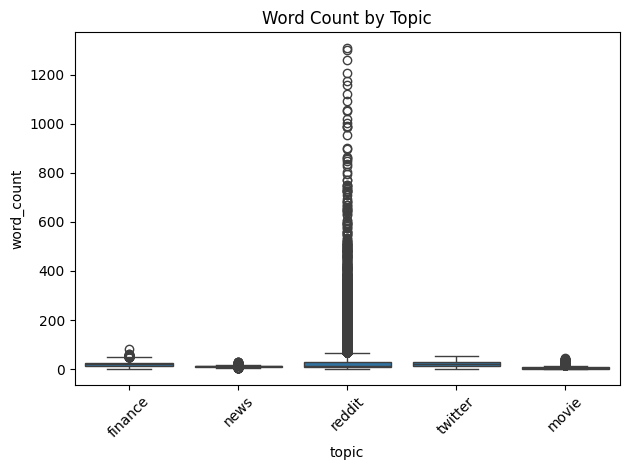

In [40]:
# Boxplot of word count

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.boxplot(x = 'topic', y = 'word_count', data = df_all)
plt.xticks(rotation=45)
plt.title('Word Count by Topic')
plt.tight_layout()
plt.show()

The median inut lengths are between 4 and 20 for each topic. To obtain more convergent distribution, all observations with longer than 50 words will be removed.

In [41]:
df_all = df_all[df_all['word_count'] <= 50] # 5,312 observations were removed
df_all.shape

(281036, 4)

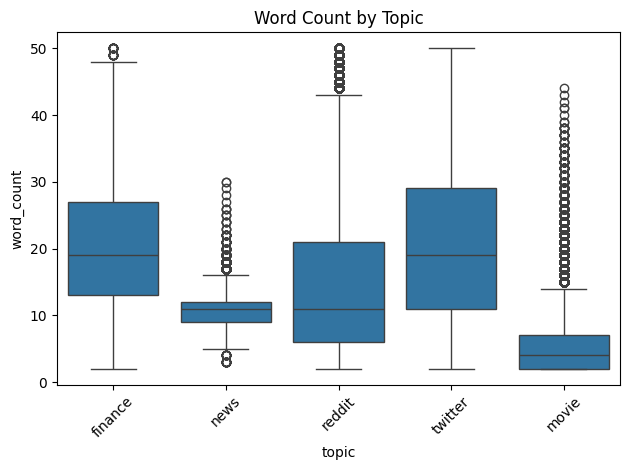

In [43]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.boxplot(x = 'topic', y = 'word_count', data = df_all)
plt.xticks(rotation=45)
plt.title('Word Count by Topic')
plt.tight_layout()
plt.savefig("/content/drive/My Drive/BA THESIS/analysis/raw_word_count_distribution_box.png")
plt.show()

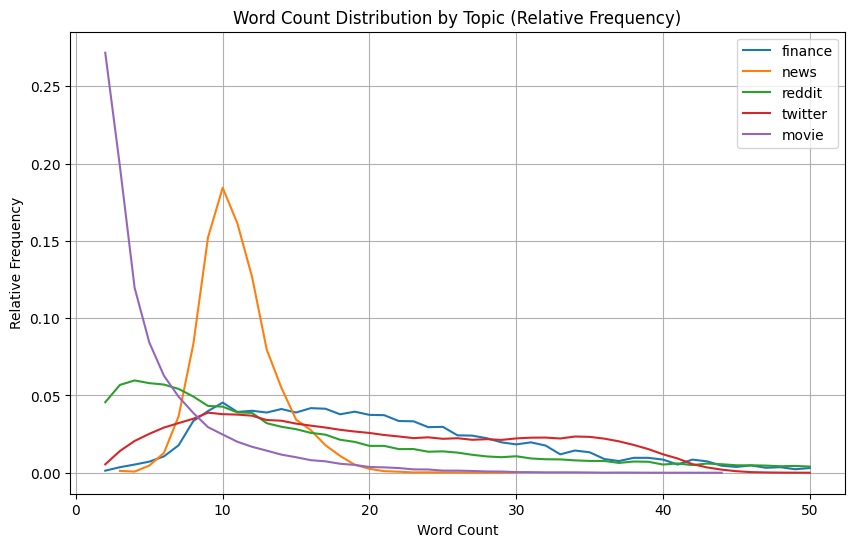

In [44]:

plt.figure(figsize=(10, 6))

for topic in df_all['topic'].unique():
    topic_data = df_all[df_all['topic'] == topic]['word_count']
    values, counts = topic_data.value_counts().sort_index().values, topic_data.value_counts().sort_index().index
    relative_freq = values/values.sum()
    plt.plot(counts, relative_freq, label=topic, marker=None)

plt.xlabel("Word Count")
plt.ylabel("Relative Frequency")
plt.title("Word Count Distribution by Topic (Relative Frequency)")
plt.legend()
plt.grid(True)
plt.savefig("/content/drive/My Drive/BA THESIS/analysis/raw_word_count_distribution_line.png")
plt.show()


In [45]:
df_all.shape

(281036, 4)

In [46]:
table = pd.crosstab(df_all["ground_truth"], df_all["topic"], margins=True)
table.columns.name = None
table

,finance,movie,news,reddit,twitter,All
ground_truth,,,,,,
negative,590,4418,9712,6730,35497,56947
neutral,2856,57273,1544,11899,54982,128554
positive,1843,5793,3607,12100,72192,95535
All,5289,67484,14863,30729,162671,281036


In [47]:
table.to_csv("/content/drive/My Drive/BA THESIS/analysis/raw_table_sentiment_topic_distribution.csv")

Accross all topics except for news, the "negative" class is the least represented. In all these categories we will resample the "neutral" and "positive" category to have the categories balanced within topics. In case of the news data, we resample it to the neutral category.

In [48]:
from sklearn.utils import resample

In [49]:
def balance_ground_truth(group):

    # counts of each class in this group
    class_counts = group["ground_truth"].value_counts()

    # minimum count among the classes
    min_count = class_counts.min()

    # Resample each class to the minimum count
    balanced_dfs = []
    for label in class_counts.index:
        df_class = group[group["ground_truth"] == label]

        # Only resample if the class has more than min_count
        if len(df_class) > min_count:
            df_class = resample(df_class, replace=False, n_samples=min_count, random_state=42)

        balanced_dfs.append(df_class)

    # Combine all balanced class DataFrames
    return pd.concat(balanced_dfs).reset_index(drop=True)

# Apply the resampling function to each topic separately
df_resampled = df_all.groupby("topic", group_keys=False).apply(balance_ground_truth)

print(df_resampled.groupby(["topic", "ground_truth"]).size())

topic    ground_truth
finance  negative          590
         neutral           590
         positive          590
movie    negative         4418
         neutral          4418
         positive         4418
news     negative         1544
         neutral          1544
         positive         1544
reddit   negative         6730
         neutral          6730
         positive         6730
twitter  negative        35497
         neutral         35497
         positive        35497
dtype: int64


<ipython-input-49-c1e6e2a269e7>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_resampled = df_all.groupby("topic", group_keys=False).apply(balance_ground_truth)


Now the sentiments are balanced but the topics still need to be balanced. To not loose to many observations we will sample down each topic that has more than 2,000 observations per sentiment to 2,000. This concerns reddit, twitter and movies topics.

In [50]:
# sample down to 2,000 each label in movie, reddit and twitter

sample_topics = ['movie', 'reddit', 'twitter']

# Split the data into two parts:
# 1. Rows where the topic is one of the sample_topics
df_to_sample = df_resampled[df_resampled['topic'].isin(sample_topics)]
# 2. Rows where the topic is not one of the sample_topics (to be retained as-is)
df_remaining = df_resampled[~df_resampled['topic'].isin(sample_topics)]

# For each ground_truth category within the sample topics, randomly sample 2000 rows.
sampled_df = df_to_sample.groupby(['ground_truth', 'topic'], group_keys=False).apply(lambda x: x.sample(n=2000, random_state=222))

# Combine the sampled subset with the rest of the data.
df_resampled = pd.concat([sampled_df, df_remaining]).reset_index(drop=True)

# Optional: Verify counts
print(df_resampled.groupby(['topic', 'ground_truth']).size())

topic    ground_truth
finance  negative         590
         neutral          590
         positive         590
movie    negative        2000
         neutral         2000
         positive        2000
news     negative        1544
         neutral         1544
         positive        1544
reddit   negative        2000
         neutral         2000
         positive        2000
twitter  negative        2000
         neutral         2000
         positive        2000
dtype: int64


<ipython-input-50-8d6e7c0743e5>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df_to_sample.groupby(['ground_truth', 'topic'], group_keys=False).apply(lambda x: x.sample(n=2000, random_state=222))


In [51]:
# Shuffle the dataset
df_balanced = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [53]:
df_balanced = df_balanced.drop(columns=['word_count'])


In [54]:
df_balanced.head()

,text,ground_truth,topic
0,bangalore south lol just piss off few people e...,positive,reddit
1,actor offers support shri urge voters cast vot...,positive,twitter
2,modi told today bjp workers that will more str...,positive,twitter
3,amazing logic soldiers are responsible for sur...,positive,twitter
4,destroying satellite only demonstrates ignoran...,negative,twitter


# Text preprocessing

In [55]:
import re
import nltk
from nltk.corpus import stopwords

In [56]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [57]:
def preprocess_text(text):
    # Remove numbers and special characters (keeping only letters and spaces)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to the text column
df_balanced["text"] = df_balanced["text"].astype(str).apply(preprocess_text)


In [58]:
df_balanced.head()

,text,ground_truth,topic
0,bangalore south lol piss people even congress ...,positive,reddit
1,actor offers support shri urge voters cast vot...,positive,twitter
2,modi told today bjp workers strict towards sca...,positive,twitter
3,amazing logic soldiers responsible surgical st...,positive,twitter
4,destroying satellite demonstrates ignorance po...,negative,twitter


Stop words, numbers and special characters have been removed. Now we inspect if any text input remains empty after this processing.

In [59]:
import numpy as np

In [60]:
df_balanced["text"] = df_balanced["text"].replace(r'^\s*$', np.nan, regex=True)


print(df_balanced.isna().sum())  # See NaN counts

text            52
ground_truth     0
topic            0
dtype: int64


In [61]:
pattern = re.compile(r'^\s*nan\s*$', flags=re.IGNORECASE)

df_balanced["text"] = df_balanced["text"].replace(pattern, np.nan, regex=True)

In [62]:
print(df_balanced.isna().sum())  # See NaN counts

text            52
ground_truth     0
topic            0
dtype: int64


In [63]:
df_balanced = df_balanced.dropna().reset_index(drop=True)

After processing, some text inputs remained empty. These were also removed

In [64]:
table = pd.crosstab(df_balanced["ground_truth"], df_balanced["topic"], margins=True)
table.columns.name = None
table

,finance,movie,news,reddit,twitter,All
ground_truth,,,,,,
negative,590,2000,1544,2000,2000,8134
neutral,590,1973,1544,1977,1998,8082
positive,590,2000,1544,2000,2000,8134
All,1770,5973,4632,5977,5998,24350


In [65]:
table.to_csv("/content/drive/My Drive/BA THESIS/analysis/raw_table_sentiment_topic_distribution_after_processing.csv")

# Lemmatizing

Additionnal processing is required for the Naive Bayes model. Both stemming and lemmatizing will be tried.

In [66]:
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [67]:
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [68]:
lemmatizer = WordNetLemmatizer()

In [69]:
def get_wordnet_pos(word):
    """Map POS tag to first character for lemmatization"""
    from nltk.corpus import wordnet
    from nltk import pos_tag

    tag = pos_tag([word])[0][1][0].upper()  # Get the POS tag and first letter
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [70]:
df_NB_lem = df_balanced.copy()

def lemm_text(text):

    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words if word not in stop_words]
    # Reconstruct the text
    return ' '.join(words)

# Apply preprocessing to the text column
df_NB_lem["text"] = df_NB_lem["text"].astype(str).apply(lemm_text)


# Stemming

In [71]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

df_NB_stem = df_balanced.copy()

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

def stem_text(text):
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords and stem words
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    # Reconstruct the text
    return ' '.join(words)

# Apply stemming to the text column
df_NB_stem["text"] = df_NB_stem["text"].astype(str).apply(stem_text)


In [72]:
df_NB_lem.head(10)

,text,ground_truth,topic
0,bangalore south lol piss people even congress ...,positive,reddit
1,actor offer support shri urge voter cast vote ...,positive,twitter
2,modi told today bjp worker strict towards scam...,positive,twitter
3,amaze logic soldier responsible surgical strik...,positive,twitter
4,destroy satellite demonstrates ignorance power...,negative,twitter
5,fringe element,neutral,reddit
6,even person reply big comedian kunal kamchod,neutral,reddit
7,arrrrey insinuate discuss debelobment plan gujrat,neutral,reddit
8,compensates somebody forge somebody signature ...,positive,reddit
9,valkyrie still trap human form die would mean ...,negative,reddit


In [73]:
df_NB_stem.head(10)

,text,ground_truth,topic
0,bangalor south lol piss peopl even congress kn...,positive,reddit
1,actor offer support shri urg voter cast vote e...,positive,twitter
2,modi told today bjp worker strict toward scams...,positive,twitter
3,amaz logic soldier respons surgic strike scien...,positive,twitter
4,destroy satellit demonstr ignor power childlik...,negative,twitter
5,fring element,neutral,reddit
6,even person repli bigger comedian kunal kamchod,neutral,reddit
7,arrrrey insinu discuss debelob plan gujrat,neutral,reddit
8,compens somebodi forg somebodi signatur clear ...,positive,reddit
9,valkyri still trap human form die would mean hell,negative,reddit


In [74]:
table = pd.crosstab(df_balanced["ground_truth"], df_balanced["topic"], margins=True)
table.columns.name = None
table

,finance,movie,news,reddit,twitter,All
ground_truth,,,,,,
negative,590,2000,1544,2000,2000,8134
neutral,590,1973,1544,1977,1998,8082
positive,590,2000,1544,2000,2000,8134
All,1770,5973,4632,5977,5998,24350


# Data Split
We split the data into 70% train, 10% validation and 20% test data.

In [75]:
from sklearn.model_selection import train_test_split

# First, split into 80% train+val and 20% test (stratifying on both 'topic' and 'ground_truth')
train_val_NB_lem, test_NB_lem = train_test_split(df_NB_lem, test_size=0.2, stratify=df_NB_lem[['topic', 'ground_truth']], random_state=222)

# Now, split train_val into 70% train and 10% validation
train_NB_lem, val_NB_lem = train_test_split(train_val_NB_lem, test_size=0.125, stratify=train_val_NB_lem[['topic', 'ground_truth']], random_state=222)
# (0.125 * 80% = 10% of the total data)

In [76]:
train_NB_lem.head()

,text,ground_truth,topic
7557,bbc considers set international base belgium b...,neutral,news
22782,young india need dynamic true nationalist visi...,negative,twitter
7060,wrench performance,positive,movie
21937,ubs rogue trader move heathrow removal centre,negative,news
5203,putin let work russia trump let make america g...,positive,twitter


In [77]:

# First, split into 80% train+val and 20% test (stratifying on both 'topic' and 'ground_truth')
train_val_NB_stem, test_NB_stem = train_test_split(df_NB_stem, test_size=0.2, stratify=df_NB_stem[['topic', 'ground_truth']], random_state=222)

# Now, split train_val into 70% train and 10% validation
train_NB_stem, val_NB_stem = train_test_split(train_val_NB_stem, test_size=0.125, stratify=train_val_NB_stem[['topic', 'ground_truth']], random_state=222)
# (0.125 * 80% = 10% of the total data)

In [78]:
train_NB_stem.head()


,text,ground_truth,topic
7557,bbc consid set intern base belgium brexit,neutral,news
22782,young india need dynam true nationalist vision...,negative,twitter
7060,wrench perform,positive,movie
21937,ub rogu trader move heathrow remov centr,negative,news
5203,putin let work russia trump let make america g...,positive,twitter


In [79]:
table = pd.crosstab(train_NB_stem["ground_truth"], train_NB_stem["topic"], margins=True)
table.columns.name = None
table

,finance,movie,news,reddit,twitter,All
ground_truth,,,,,,
negative,413,1400,1081,1400,1400,5694
neutral,413,1381,1081,1384,1399,5658
positive,413,1400,1080,1400,1400,5693
All,1239,4181,3242,4184,4199,17045


In [ ]:
#table = pd.crosstab(test_NB["ground_truth"], test_NB["topic"], margins=True)
#table.columns.name = None
#table

In [80]:
# First, split into 80% train+val and 20% test (stratifying on both 'topic' and 'ground_truth')
train_val_BERT, test_BERT = train_test_split(df_balanced, test_size=0.2, stratify=df_balanced[['topic', 'ground_truth']], random_state=222)

# Now, split train_val into 70% train and 10% validation
train_BERT, val_BERT = train_test_split(train_val_BERT, test_size=0.125, stratify=train_val_BERT[['topic', 'ground_truth']], random_state=222)
# (0.125 * 80% = 10% of the total data)

In [81]:
train_BERT.head()

,text,ground_truth,topic
7557,bbc considers setting international base belgi...,neutral,news
22782,young india needs dynamic true nationalist vis...,negative,twitter
7060,wrenching performances,positive,movie
21937,ubs rogue trader moved heathrow removal centre,negative,news
5203,putin lets work russia trump lets make america...,positive,twitter


In [82]:
table = pd.crosstab(train_BERT["ground_truth"], train_BERT["topic"], margins=True)
table.columns.name = None
table

,finance,movie,news,reddit,twitter,All
ground_truth,,,,,,
negative,413,1400,1081,1400,1400,5694
neutral,413,1381,1081,1384,1399,5658
positive,413,1400,1080,1400,1400,5693
All,1239,4181,3242,4184,4199,17045


# Save the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [83]:
path = "/content/drive/My Drive/BA THESIS/data"

In [84]:
# Save the data
train_NB_lem.to_csv(os.path.join(path, 'train_NB_lem.csv'), index=False)
val_NB_lem.to_csv(os.path.join(path, 'val_NB_lem.csv'), index=False)
test_NB_lem.to_csv(os.path.join(path, 'test_NB_lem.csv'), index=False)

In [85]:
train_NB_stem.to_csv(os.path.join(path, 'train_NB_stem.csv'), index=False)
val_NB_stem.to_csv(os.path.join(path, 'val_NB_stem.csv'), index=False)
test_NB_stem.to_csv(os.path.join(path, 'test_NB_stem.csv'), index=False)

In [86]:
train_BERT.to_csv(os.path.join(path, 'train_BERT.csv'), index=False)
val_BERT.to_csv(os.path.join(path, 'val_BERT.csv'), index=False)
test_BERT.to_csv(os.path.join(path, 'test_BERT.csv'), index=False)